# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse Skull Nuclei` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.1980305641889572+-(2SEM)0.01930398573123482      
Epoch 1 finished      
avg. loss: 0.16118732132017613+-(2SEM)0.018027735698037492      
Epoch 2 finished      
avg. loss: 0.14728658720850946+-(2SEM)0.018996932771069307      
Epoch 3 finished      
avg. loss: 0.12422066759318114+-(2SEM)0.017728620732862025      
Epoch 4 finished      
avg. loss: 0.13097906298935413+-(2SEM)0.011581254912755015      
Epoch 5 finished      
avg. loss: 0.12438365705311298+-(2SEM)0.01334740231973394      
Epoch 6 finished      
avg. loss: 0.12137179858982564+-(2SEM)0.012545250692314514      
Epoch 7 finished      
avg. loss: 0.10738112982362509+-(2SEM)0.010758286993084643      
Epoch 8 finished      
avg. loss: 0.1315711509436369+-(2SEM)0.0153512159235976      
Epoch 9 finished      
avg. loss: 0.1084009388461709+-(2SEM)0.014961157024867886      
Epoch 10 finished      
avg. loss: 0.11409525573253632+-(2SEM)0.01073305197661614      
Epoch 11 finished      
avg. loss: 0.10

Epoch 89 finished      
avg. loss: 0.10758028533309698+-(2SEM)0.011303034729751527      
Epoch 90 finished      
avg. loss: 0.11443945206701756+-(2SEM)0.009330370704307676      
Epoch 91 finished      
avg. loss: 0.1245799757540226+-(2SEM)0.015009817001249275      
Epoch 92 finished      
avg. loss: 0.10789617039263248+-(2SEM)0.008704040838124774      
Epoch 93 finished      
avg. loss: 0.11650172770023345+-(2SEM)0.016122730109906436      
Epoch 94 finished      
avg. loss: 0.09365458227694035+-(2SEM)0.00998360650634173      
Epoch 95 finished      
avg. loss: 0.11876239776611328+-(2SEM)0.012668372003627037      
Epoch    95: reducing learning rate of group 0 to 7.8125e-06.
Epoch 96 finished      
avg. loss: 0.1228424370288849+-(2SEM)0.009968801600809336      
Epoch 97 finished      
avg. loss: 0.1069701511412859+-(2SEM)0.01238918401003486      
Epoch 98 finished      
avg. loss: 0.1094920851290226+-(2SEM)0.016480617866492533      
Epoch 99 finished      
avg. loss: 0.10196422636508942

Epoch 176 finished      
avg. loss: 0.09420519601553679+-(2SEM)0.009441215198805168      
Epoch 177 finished      
avg. loss: 0.10541809871792793+-(2SEM)0.013136696581266377      
Epoch   177: reducing learning rate of group 0 to 6.1035e-08.
Epoch 178 finished      
avg. loss: 0.11273680925369263+-(2SEM)0.00992860538178096      
Epoch 179 finished      
avg. loss: 0.11636969074606895+-(2SEM)0.01467752196681428      
Epoch 180 finished      
avg. loss: 0.10735602788627148+-(2SEM)0.010156284377429057      
Epoch 181 finished      
avg. loss: 0.10154626183211804+-(2SEM)0.011529227889510716      
Epoch 182 finished      
avg. loss: 0.11310680955648422+-(2SEM)0.013065444047801475      
Epoch 183 finished      
avg. loss: 0.11028117332607508+-(2SEM)0.012891807336374813      
Epoch 184 finished      
avg. loss: 0.12553627751767635+-(2SEM)0.012442637405807758      
Epoch 185 finished      
avg. loss: 0.10239357054233551+-(2SEM)0.010946120071483417      
Epoch 186 finished      
avg. loss: 0.11

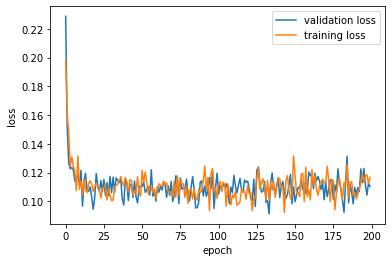

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()